<a href="https://colab.research.google.com/github/sipocz/Colab/blob/main/Nemline%C3%A1ris_transzform%C3%A1ci%C3%B3k_handout_kitoltve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bevezető

Az előző órán lineáris transzformációkat vizsgáltunk meg. Ezek a technikák a reprezentáció tanulás (representation learning) területén találhatók. Azért kezdtünk lineáris technikákkal, mert ezeket könnyebb megérteni (matematikailag), illetve azért, mert ez az időrendi sorrend, így tudunk építkezni.

A transzformáiók esetén mutattam több példát. A feladat az, hogy hogyan fogalmazzuk meg azt formulákkal, amit el szeretnénk érni, amit várunk a rendszertől. Például: szeretném-e csak a hibát csökkenteni, vagy szeretnék mellette még ritka reprezentációt is létrehozni.

Ma nemlináris transzformációkkal fogunk foglalkozni.

* A probléma a lineáris a transzformácókkal, hogy az adatok ritkán helyezkednek el lináris struktúrán.
* A sejtés az, hogy a valóságban előforduló adatok egy [manifold](https://en.wikipedia.org/wiki/Manifold)-on helyezkednek el.
* A lineáris projekció, illetve a megismert módszerek nem foglalkoznak az adatpontok egymáshoz viszonyított struktúrájával, az adatpontok topológiájával.

A mai órán, továbblépésként beágyazásokat, nemlineáris dimenzió csökkentő módszereket fogunk megismerni.

Több info:
- https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction
- https://scikit-learn.org/stable/modules/manifold.html


# Manifold

Ahogy arról már szó volt a lineáris esetben is, az óra végén, a természetes úton előálló adatok nem töltik ki a teljes teret, hanem egy adott struktúrát követnek. A sejtés az, hogy ez a struktúra nem lineáris, viszont lokálisan lineáris, mint az a tér is, amiben élünk. Például: gravitáció hatása a fényre. Lásd: http://chemonet.hu/hun/teazo/hogyan/feny.html

![Self-organizing maps](https://upload.wikimedia.org/wikipedia/commons/2/2d/BoysSurfaceTopView.PNG)

A manifold egy olyan topológiai tér, amely minden pont környékén euklideszi teret alkot. A topológiai tér egy nagyon általánosan megfogalmazott matematikai tér. Főleg a pontokkal és a szomszédossággal foglalkozik. Egy dimenziós manifoldra példa: vonal és kör. A nyolcas nem egydimenziós manifold, mert a kereszteződés nem képezhető le 1 dimenziós térre.

Ha valakit érdekel: https://en.wikipedia.org/wiki/Manifold

Akit részletesebben érdekelnek a reprezentáció tanulás alapelvei: https://arxiv.org/abs/1206.5538


# Szemléltető példa: S

type of X: <class 'numpy.ndarray'>
type of Y: <class 'numpy.ndarray'>


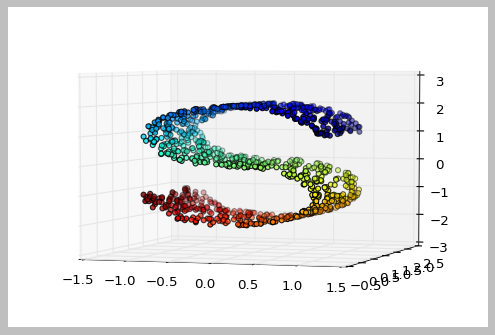

1000

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

n_points = 1000

X, Y = datasets.make_s_curve(n_points, random_state=0)
print("type of X: " + str(type(X)))
print("type of Y: " + str(type(Y)))

fig = plt.figure(figsize=(6,4))
ax = Axes3D(fig, elev=-150, azim=110)
ax.view_init(4, -72)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=Y)

plt.style.use(['classic'])
plt.show()
type(Y)
len(Y)

# --> Feladat 1: PCA alapú vizualizáció

Jelenítsük meg PCA-val az "S" betűt!
Két dimenziós plotot szeretnénk.

In [9]:
# Az sklearn.decomposition package-ből importáljuk be a PCA osztályt!
from sklearn.decomposition import PCA
# Hozzuk létre a transzformációt a tr_pca változóba (n_components=2)!
pr_ppc=PCA(n_components=2)
# Transzformáljuk a mintát az X_pca változóba a fit_transform segítségével!
X_pca=pr_ppc.fit_transform(X)
# Írassuk ki az X_pca2 méreteit (shape mező)!
X_pca.shape

(1000, 2)

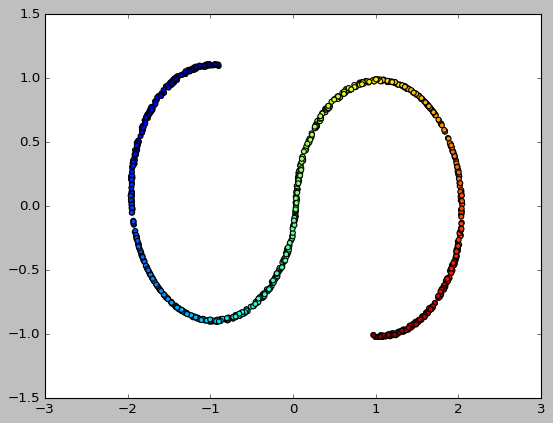

In [10]:
# Kezdjünk új ábrát (plt.figure)!
plt.figure()
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.scatter(X_pca[:,0],X_pca[:,1],c=Y)
# Állítsuk be a tengelyek címkéit és a címet!
...
...
...
# Jelenítsük meg a plt.show metódus segítségével!
plt.show()

# --> Feladat 1 vége

# PCA interpretálása, továbblépés

Végülis annyira nem rossz, az S formát megtalálta. Viszont jobban örülnénk, ha kiterítené nekünk az adatokat, mint például egy rongyszőnyeget. Legalábbis intuitíve ezt várnánk el egy nemlineáris módszertől.

A kérdés az, hogy hogyan tudjuk ezt matematikailag megfogalmazni. Mindezt lehetőleg úgy, hogy általánosan, minden esetben működjön.

Utalás: no free lunch theorem: https://en.wikipedia.org/wiki/No_free_lunch_theorem

A módszerek megpróbálják megőrizni az alábbiak valamelyikét:
* korrelációs struktúra
* lokális távolsági viszonyok
* összekötöttségi viszonyok


# Self-organizing maps (SOM)

* 80-as években vezette be Teuvo Kohonen (nagy név a szakmában)
* A cél: magas dimenziójú adatok alacsony dimenzióban való megjelenítése
* Egy "hálót" húz rá az adatokra
  * A hálót véletlenszerűen elhelyezi a térben.
  * A hálót iteratívan elkezdi közelíteni az adatokhoz.
* Részletek: https://en.wikipedia.org/wiki/Self-organizing_map

![Self-organizing maps](https://drive.google.com/uc?export=view&id=1fk-z-_KTY38psNvatlazF8ZYeL9L8zaW)
Forrás: https://en.wikipedia.org/wiki/Self-organizing_map

Ha valakit érdekel: https://github.com/sevamoo/SOMPY/blob/master/sompy/examples/california_housing_rectangular_grid.ipynb

# SOM vs PCA

![SOMvsPCA](https://upload.wikimedia.org/wikipedia/commons/b/bb/SOMsPCA.PNG)




# Multidimensional scaling (MDS)

* Hasonlóság alapú transzformáció
 * Távolsági mátrixon (distance matrix) alapul. Gyakran előfordul, illetve lásd még: hasonlósági mátrix.
 * A távolsági mátrix még elő fog fordulni, például a klaszterezésnél.
* A módszer elve: úgy transzformáljuk át egy másik térbe az adatpontjainkat, hogy megpróbáljuk a köztük levő távolságot minél jobban megőrizni.
* Általános módszer, N dimenzió esetén van definiálva.
* Vizualizációra praktikusan 2 dimenziót használunk. Tehát N dimenzióból képezünk át 2 dimenzióba.
* Matematikai megfogalmazás: a Stress függvény minimalizálása.
 * $x$: minta az eredeti térben
 * $y$: minta a beágyazott térben
 * $$Stress_D(x_1,x_2,...,x_N)=\Biggl(\frac{\sum_{i,j}\bigl(d_{ij}-\|x_i-x_j\|\bigr)^2}{\sum_{i,j}d_{ij}^2}\Biggr)^{1/2}$$
 * $d_{ij}$ a távolság függvény a 2 dimenziós térben: $d_{ij}=\|y_i-y_j\|_2$
 * Ebben az esetben az irodalom szerint van explicit megoldás. Az explicit megoldást általában gyorsan ki lehet számolni, az iteratív tipikusan lassú.
* Az általános megoldás numerikus (iteratív).
* Részletek: https://en.wikipedia.org/wiki/Multidimensional_scaling

# --> Feladat 2: MDS alapú vizualizáció

* from sklearn import manifold.MDS

In [16]:
# Importáljuk be az sklearn.manifold csomagból az MDS osztályt!
from sklearn.manifold import MDS 
# Hozzunk létre a tr_mds változóba egy MDS példányt, ami két dimenziós!
# Opcionális paraméterek: max_iter=100, n_init=1
tr_mds=MDS(3,max_iter=100,n_init=1)
# Transzformáljuk át X-et az X_mds-be a fit_transform segítségével!
X_mds=tr_mds.fit_transform(X)
# Írassuk ki X_mds2 méretét!
type(X_mds)

numpy.ndarray

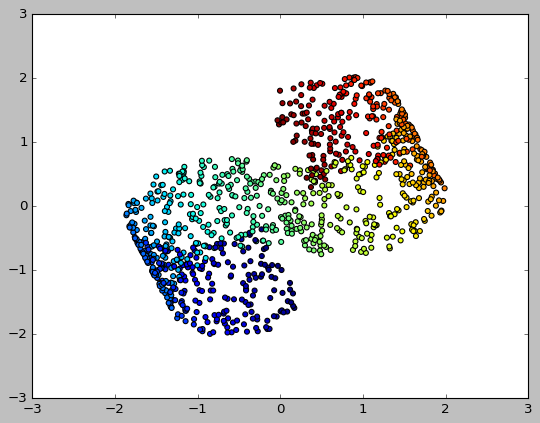

In [18]:
# Jelenítsük meg a transzformált adatokat a PCA-hoz hasonlóan!
# Kezdjünk új ábrát (plt.figure)!
plt.figure()
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.scatter(X_mds[:,0],X_mds[:,1],c=Y)
# Állítsuk be a tengelyek címkéit és a címet!
...
...
...
# Jelenítsük meg a plt.show metódus segítségével!
plt.show()


# --> Feladat 2 vége

# ISOMAP

* Szomszédságot is használ a transzformációhoz (geodesic distance)
* Egy gráfot (hálózatot) készítünk a pontokból
 * Vegyük a pont szomszédait
   * Adott rádiuszon belül (threshold, felső korlát, hogy mit tekintünk szomszédnak)
   * Ehhez kell egy távolság függvény, általában euklideszi. Ilyenünk általában szokott lenni, tehát nem gond.
   * K legközelebbi, azaz felső korlát a futásidőre, memória használatra.
 * Hozzuk létre a gráfot úgy, hogy a pontokat összekötjük a szomszédaikkal.
 * Az él súlya a távolság.
* A távolság új definíciója
 * Új távolság: A gráf két csúcsa közötti legrövidebb út élei súlyának összege
 * A legrövidebb utak számolhatók például: Dijkstra, Floyd-Warshall
 * Előjön a tranzitivitás fogalma (szomszéd szomszédja)
* Innentől visszavezetjük az MDS-re (gyakorlatileg a távolság függvényt cseréltük le)
 
Részletek: https://en.wikipedia.org/wiki/Isomap

# --> Feladat 3: ISOMAP alapú vizualizáció

In [22]:
# Az sklearn.manifold csomagból importáljuk be az Isomap osztályt!
from sklearn.manifold import Isomap
# Hozzunk létre egy Isomap példányt a tr_isomap változóba!
# Segítség: n_neighbors=10, n_components=2
tr_isomap=Isomap(n_components=2,n_neighbors=10)
# Transzformáljuk át az adatokat egy X_isomap változóba!
X_isomap=tr_isomap.fit_transform(X)
# Írassuk ki az X_isomap méretét (shape attribútum)!
X_isomap.shape

(1000, 2)

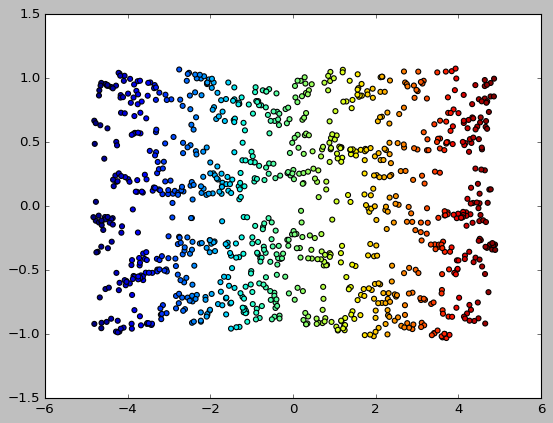

In [24]:
# Jelenítsük meg a transzformált adatokat a PCA-hoz hasonlóan!
# Jelenítsük meg a transzformált adatokat a PCA-hoz hasonlóan!
# Kezdjünk új ábrát (plt.figure)!

plt.figure()
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.scatter(X_isomap[:,0],X_isomap[:,1],c=Y)
# Állítsuk be a tengelyek címkéit és a címet!

# Jelenítsük meg a plt.show metódus segítségével!

plt.show()

# --> Feladat 3 vége

# LLE (locally-linear embedding)

* Az ISOMAP-pal egy időben publikálták.
* Gyorsabb, mint az ISOMAP.
* Egy pontot a szomszédai lineáris kombinációjaként állít elő. Lásd: manifold.
* A hibafüggvény a lineáris kombináció hibája $$E(W) = \sum_i |{\mathbf{X}_i - \sum_j {\mathbf{W}_{ij}\mathbf{X}_j}|}^\mathsf{2}$$
* A következő feltételekkel
 * Egy pontot csak a szomszédai kombinációjából áll elő, azaz a többi súly nulla.
 * Normalizált, azaz $\sum_j {\mathbf{W}_{ij}} = 1$
 * Tehát az első lépésben a feladat $W$-k kiszámítása.
* Az új térben ugyanazok a súlyok (lineáris kombinációk) $$C(Y) = \sum_i |{\mathbf{Y}_i - \sum_j {\mathbf{W}_{ij}\mathbf{Y}_j}|}^\mathsf{2}$$
 * Tehát második körben a feladat az $Y$-ok kiszámítása.
 
Részletek: https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction#Locally-linear_embedding

# --> Feladat 4: LLE alapú vizualizáció


In [ ]:
# Az sklearn.manifold csomagból importáljuk be a LocallyLinearEmbedding osztályt!
...
# Hozzunk létre egy példányt a tr_lle változóba!
# Segítség: 10, 2, eigen_solver='auto'
...
# Transzformáljuk át X-et egy X_lle változóba!
...
# Írassuk ki X_lle méretét (shape attribútum)!
...

(1000, 2)

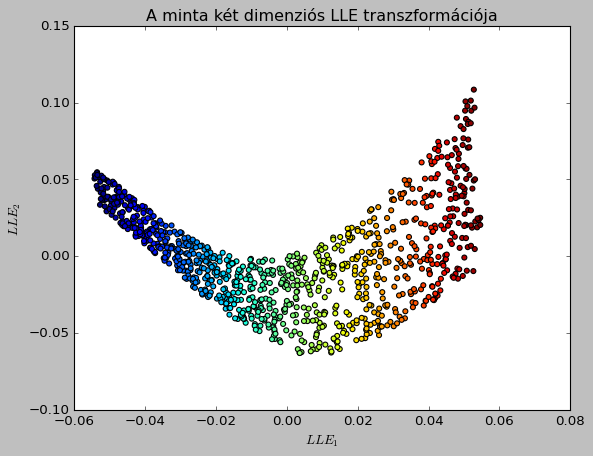

In [ ]:
# Jelenítsük meg a transzformált adatokat a PCA-hoz hasonlóan!
...
...
...
...
...
...

# --> Feladat 4 vége

# Spectral embedding

* Szomzédsági gráf alapú módszer
* A gráf előállítását lásd: ISOMAP
* Az új bázis: a gráf Laplacian sajátvektorai.
 * https://en.wikipedia.org/wiki/Laplacian_matrix
 * https://en.wikipedia.org/wiki/Spectral_clustering
 * Laplacian: diagonális (node degree) - szomszédsági mátrix

In [ ]:
# Az sklearn.manifold csomagból importáljuk be a SpectralEmbedding osztályt!
...
# Hozzunk létre egy példányt a tr_se változóba!
# Segítség: n_components=2, n_neighbors=200
...
# Transzformáljuk át az adatokat egy X_se változóba!
...

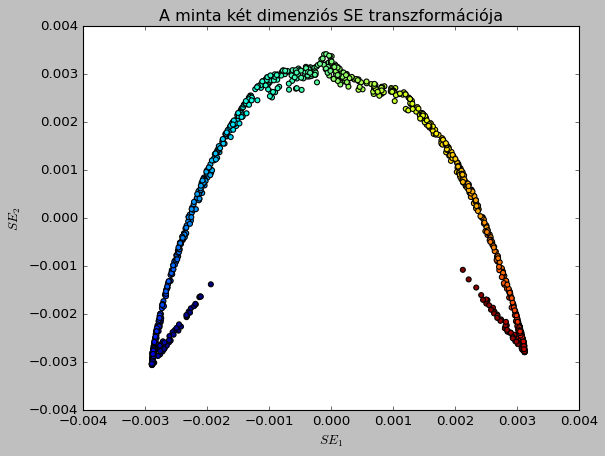

In [ ]:
# Jelenítsük meg a transzformált adatokat a PCA-hoz hasonlóan!
...
...
...
...
...
...

# t-SNE

* Felkapott módszer
* t-distributed stochastic neighbor embedding
  * https://lvdmaaten.github.io/tsne/
  * https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
* Az interpretációja:
  * Eredeti térben: feltételes valószínűséggel modellezi a hasonlóságokat.
  * A beágyazott térben a pontok távolságávál arányos a hasonlóság.
  * A két térben levő hasonlóságok eloszlását közelíti egymáshoz.
* Interaktív játék t-SNE-vel: https://distill.pub/2016/misread-tsne/

# --> Feladat 5: Vizualizáció t-SNE segítségével

In [27]:
# Az sklearn.manifold csomagból importáljuk be a TSNE osztályt!
# Az sklearn.manifold csomagból importáljuk be az Isomap osztályt!
from sklearn.manifold import TSNE
# Hozzunk létre egy Isomap példányt a tr_isomap változóba!
# Segítség: n_components=2, init='pca', random_state=0.
tr_tsne=TSNE(n_components=2, init='pca', random_state=0)
# Transzformáljuk át az adatokat egy X_isomap változóba!
X_tsne=tr_tsne.fit_transform(X)
# Írassuk ki az X_isomap méretét (shape attribútum)!
X_tsne.shape

(1000, 2)

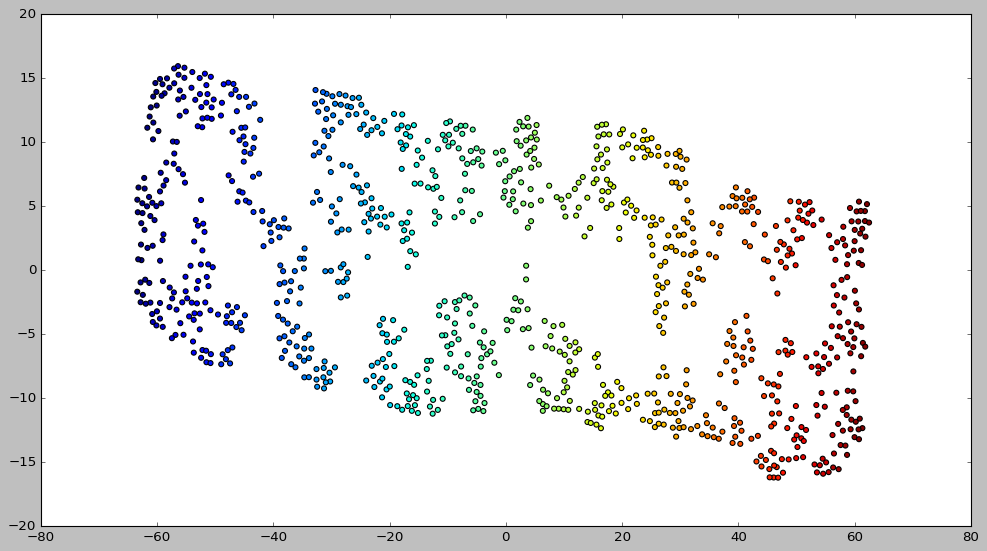

In [30]:
# Jelenítsük meg a transzformált adatokat a PCA-hoz hasonlóan!
plt.figure(figsize=(15, 8))
# Rajzoljunk a plt.scatter segítségével!
# Segítség: X_pca[:, 0], X_pca[:, 1], c=Y
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=Y)
# Állítsuk be a tengelyek címkéit és a címet!

# Jelenítsük meg a plt.show metódus segítségével!

plt.show()

# --> Feladat 5 vége

# Összefoglaló

Automatically created module for IPython interactive environment
standard: 0.18 sec
ltsa: 0.27 sec
hessian: 0.39 sec
modified: 0.29 sec
Isomap: 0.57 sec
MDS: 2.2 sec
SpectralEmbedding: 0.16 sec
t-SNE: 7.5 sec


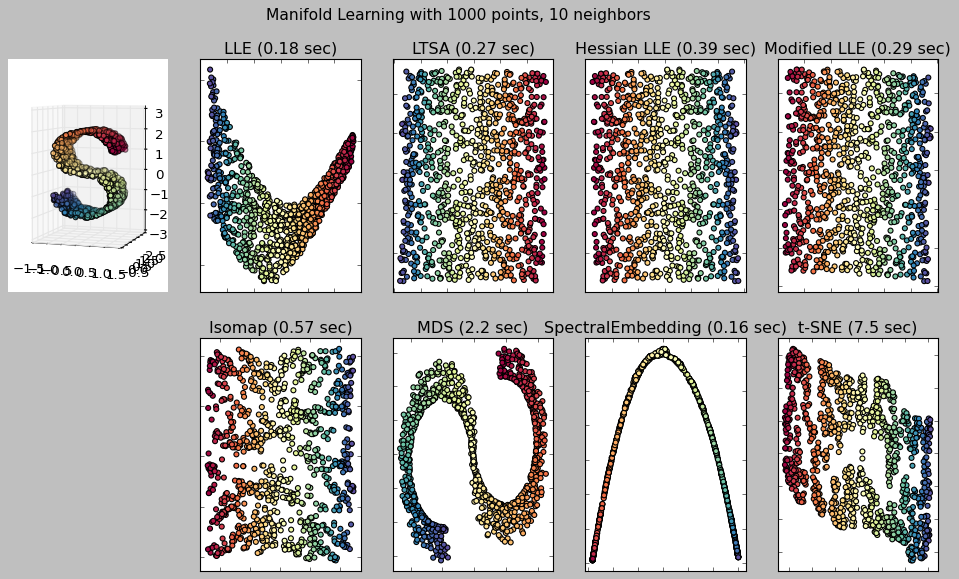

In [ ]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)


ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y = se.fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

Automatically created module for IPython interactive environment
standard: 0.12 sec
ltsa: 0.17 sec
hessian: 0.26 sec
modified: 0.2 sec
ISO: 0.3 sec
MDS: 1.2 sec
Spectral Embedding: 0.11 sec
t-SNE: 4.5 sec


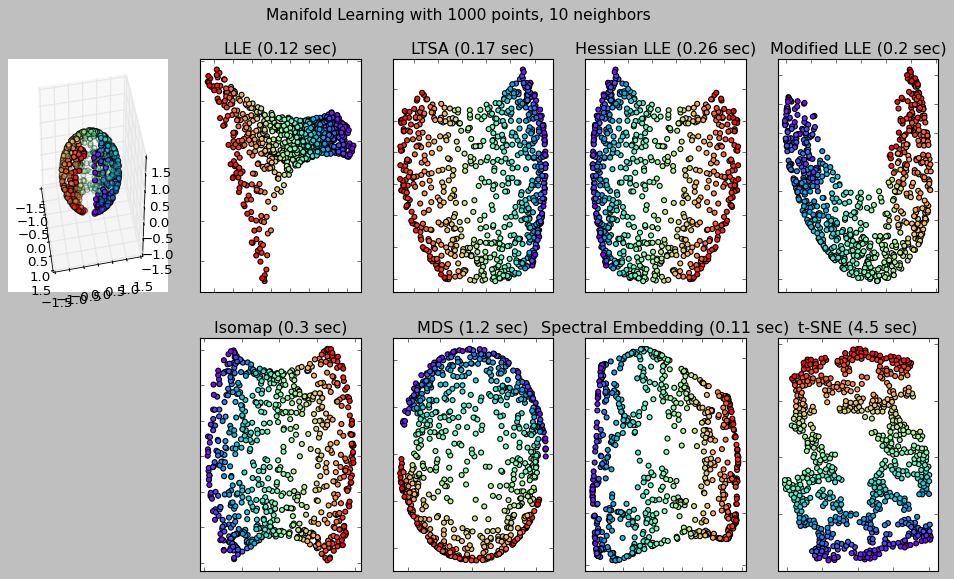

In [ ]:
# Author: Jaques Grobler <jaques.grobler@inria.fr>
# License: BSD 3 clause

print(__doc__)

from time import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Next line to silence pyflakes.
Axes3D

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = ((t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))))
colors = p[indices]
x, y, z = np.sin(t[indices]) * np.cos(p[indices]), \
    np.sin(t[indices]) * np.sin(p[indices]), \
    np.cos(t[indices])

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# Perform Locally Linear Embedding Manifold learning
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

for i, method in enumerate(methods):
    t0 = time()
    trans_data = manifold\
        .LocallyLinearEmbedding(n_neighbors, 2,
                                method=method).fit_transform(sphere_data).T
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

# Perform Isomap Manifold learning.
t0 = time()
trans_data = manifold.Isomap(n_neighbors, n_components=2)\
    .fit_transform(sphere_data).T
t1 = time()
print("%s: %.2g sec" % ('ISO', t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ('Isomap', t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1)
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(n_components=2,
                                n_neighbors=n_neighbors)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

# Reprezentáció alapelvek
​
* Smooth - $x~y$, implies that $f(x)~f(y)
* Multiple explanatory factors - The data has to be generated by several underlying factors. Not one.
* Disentangling factors - Somehow independent, not necessarily orthogonal.
* Sparsity - Only a few explanatory factors for each observation.
* Hierarchical organization of the explanatory factors - More and less abstract concepts, deep learning.
* Simplicity - In good, high level representations the factors are related to each other through simple (in most cases linear) dependencies.
* Coherence - Spatially nearby observations should be associated with the same value of categorical concepts.
* Manifolds - Different values of categorical variables are associated with separate manifolds.
​

Forrás: Representation Learning: A Review and New Perspectives by Bengio et al.


Link: https://arxiv.org/abs/1206.5538